Дурыманов Евгений Валерьевич, отчет по квази-ньютоновским алгоритмам градиентного спуска с разным выбором $H_{k+1}$.


In [39]:
import bisect
import sys
from test_functions import test_functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
rec = 100000
sys.setrecursionlimit(rec)

In [40]:
def func_1(x, n):
    return sum(100 * ((x[0] - x[1]) ** 2) + 5 * (1 - x[j]) ** 2 for j in range(1, n))

def func_1_grad(x, n):
    result = x * 10 - 10
    result[0], result[1] = 200 * x[0] - 200 * x[1], -200 * x[0] + 210 * x[1] - 10
    return np.array(result)

def func_2(x_1, x_2):
    return 100 * (x_2 - x_1 ** 2) ** 2 + 5 * (1 - x_1) ** 2

def func_2_grad(x_1, x_2):
    return np.array((10 * (40 * x_1 ** 3 - 40 * x_1 * x_2 + x_1 - 1), 200 * (x_2 - x_1 ** 2)))

In [41]:
def get_alpha(f, fgrad, cur_x, direction,  alpha=0.4, beta = 0.8):
    def phi(gamma):
        return gamma * (fgrad(cur_x[0], cur_x[1]) @ (cur_x - new_x))

    cur_h = 0.5
    min_h, max_h = 0, 1
    counter = 0
    while True and counter < 1000:
        counter += 1
        new_x = cur_x - cur_h * direction
        if f(cur_x[0], cur_x[1]) - f(new_x[0], new_x[1]) > phi(alpha):
            new_h = (max_h - cur_h) / 2

        elif (f(cur_x[0], cur_x[1]) - f(new_x[0], new_x[1])) < phi(beta):
            new_h = (min_h + cur_h) / 2
            max_h = cur_h
        else:
            break
        cur_h = new_h
    return cur_h

In [57]:
def grad(f, fgrad, d, gamma, H, it, case, n, counter):

    counter += 1

    if case == 1:
        temp_scalar = (d - H @ gamma) @ gamma
        if temp_scalar < 10 ** (-3) == 0:
            H_next = np.eye(n)
        else:
            H_next = H + (1 / temp_scalar) * np.outer((d - H @ gamma), np.transpose(d - H @ gamma))
        direction = H_next @ fgrad(it, n)
        if counter < 1:
            next_it = it - get_alpha(f, fgrad, it, direction) * direction
        else:
            next_it = it - H_next @ fgrad(it, n)
        d_next = next_it - it
        gamma_next = fgrad(next_it, n) - fgrad(it, n)

    elif case == 2:
        temp_1 = (1 / (gamma @ d)) * (np.outer(np.transpose(d), d))
        temp_2 = (1 / ((H @ gamma) @ gamma)) * (np.outer((H @ gamma), np.transpose(H @ gamma)))
        H_next = (H + temp_1 - temp_2)
        direction = H_next @ fgrad(it, n)
        if counter < 1:
            alpha = get_alpha(f, fgrad, it, direction)
            next_it = it - alpha * direction
        else:
            next_it = it - direction
        d_next = next_it - it
        gamma_next = fgrad(next_it, n) - fgrad(it, n)

    else:
        temp_1 = 1 / ((H @ gamma) @ gamma)
        temp_2 = np.outer(H @ gamma, np.transpose(d))
        temp_3 = np.outer(d, np.transpose(H @ gamma))
        temp_4 = 1 +((gamma @ d) / ((H @ gamma) @ gamma))
        temp_5 = np.outer((H @ gamma), np.transpose(H @ gamma))
        H_next = (H + temp_1 * (temp_2 + temp_3) - temp_1 * temp_4 * temp_5)
        direction = H_next @ fgrad(it, n)
        if counter < 1:
            next_it = it - get_alpha(f, fgrad, it, direction) * direction
        else:
             next_it = it - direction
        d_next = next_it - it
        gamma_next = fgrad(next_it, n) - fgrad(it, n)

    #xs.append(next_it[0]), ys.append(next_it[1])
    if abs(f(next_it, n) - f(it, n)) < 10 ** (-5):
        return next_it, f(next_it, n), counter

    return grad(f, fgrad, d_next, gamma_next, H_next, next_it,case, n, counter)


(array([0.94244982, 0.88378191]), 0.018522385064196817, 12)


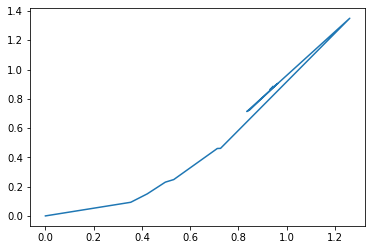

(array([0.99432679, 0.98785509]), 0.00022992791954709686, 13)


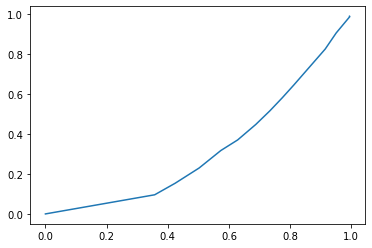

(array([0.99593804, 0.99111357]), 0.00014318266283499075, 13)


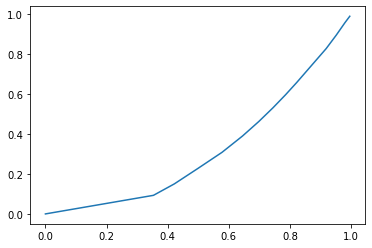

In [24]:
start = np.array((0, 0))
for case in [1, 2, 3]:
    counter = 0
    x_s = [start[0]]
    y_s = [start[1]]
    H_0 = np.eye(2)
    direction = H_0 @ func_2_grad(start[0], start[1])
    it_1 = start - get_alpha(func_2, func_2_grad, start, direction) * direction
    d = it_1 - start
    grad_it_1 = func_2_grad(it_1[0], it_1[1])
    gamma = grad_it_1 - func_2_grad(start[0], start[1])
    result = grad(func_2, func_2_grad, d, gamma, H_0, it_1, x_s, y_s, case, counter)
    print(result)
    plt.plot(x_s, y_s)
    plt.show()

На графиках выше показаны траектории точки при приближении к минимуму для трех методов: Бройдена, ДФП и БФГШ для функции Розенброка. Над графиками обозрачены сами точки минимума, значения в них, а также количество итераций алгоритма. Первые несколько шагов (5, 10, 10) считаются демпифрующими, длина шага вычисляется из условия Голдштейна - Армихо с параметрами $\alpha = 0.4, \beta = 0.8$. Параметр остановки - разница между значениями функций на различных итераций $= 10^{-5}$

(array([1., 1.]), 6.162975822039155e-30, 3)


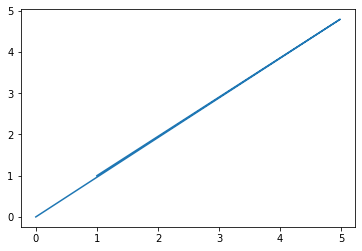

(array([1., 1.]), 3.665137810858606e-16, 3)


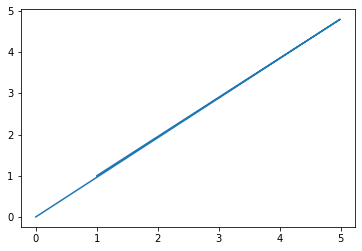

(array([1., 1.]), 6.042043820005437e-19, 3)


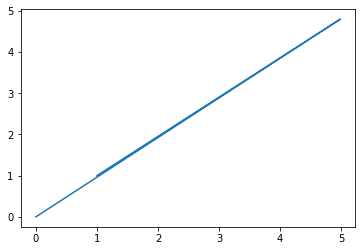

In [15]:
n = 2
start = np.array((0, 0))
for case in [1, 2, 3]:
    counter = 0
    x_s = [start[0]]
    y_s = [start[1]]
    H_0 = np.eye(n)
    direction = H_0 @ func_1_grad(start, n)
   # it_1 = start - get_alpha(func_1, func_1_grad, start, direction) * direction
    it_1 = start - direction
    d = it_1 - start
    grad_it_1 = func_1_grad(it_1, n)
    gamma = grad_it_1 - func_1_grad(start, n)
    result = grad(func_1, func_1_grad, d, gamma, H_0, it_1, x_s, y_s, case, counter)
    print(result)
    plt.plot(x_s, y_s)
    plt.show()

Аналогично, но для квадратичной функции, однако здесь уже не используется демпфирующий шаг с помощью Армихо, так как и без него к миниму происходит спускание.

In [63]:
for n in (3, 5, 10):
    start = np.zeros(n)
    for case in [1, 2, 3]:
        counter = 0
        H_0 = np.eye(n)
        direction = H_0 @ func_1_grad(start, n)
        it_1 = start - direction
        d = it_1 - start
        grad_it_1 = func_1_grad(it_1, n)
        gamma = grad_it_1 - func_1_grad(start, n)
        result = grad(func_1, func_1_grad, d, gamma, H_0, it_1, case, n, counter)
        if case == 1:
            method = "Метод Бройдена"
        elif case == 2:
            method = "Правило ДФП"
        else:
            method = "Правило БФГШ"
        print(method, ":  Dimension = " ,n, ",  Counter of iterations = " ,result[-1])
    print('\n')

Метод Бройдена :  Dimension =  3 ,  Counter of iterations =  4
Правило ДФП :  Dimension =  3 ,  Counter of iterations =  6
Правило БФГШ :  Dimension =  3 ,  Counter of iterations =  6


Метод Бройдена :  Dimension =  5 ,  Counter of iterations =  4
Правило ДФП :  Dimension =  5 ,  Counter of iterations =  6
Правило БФГШ :  Dimension =  5 ,  Counter of iterations =  7


Метод Бройдена :  Dimension =  10 ,  Counter of iterations =  4
Правило ДФП :  Dimension =  10 ,  Counter of iterations =  7
Правило БФГШ :  Dimension =  10 ,  Counter of iterations =  8




Аналогично для квадратичной функции, но с различными измерениями(тоже без параметра Армихо), без рисунков(по понятным причинам).